In [1]:
# import packages
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from pyimagesearch.nn.conv import LeNet
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2
import os

In [2]:
args = {
    'dataset' : '/floyd/input/smile_datasets',
    'model' : 'output/lenet.hdf5',
}

# intialize the list of data and labels
data = []
labels = []

In [3]:
# loop over the input iamges
for imagePath in sorted(list(paths.list_images(args['dataset']))):
    # load the image, pre-process it and store in the data list
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = imutils.resize(image, width=28)
    image = img_to_array(image)
    data.append(image)
    

    #asdasds
    #extract the class labels from the image path and update 
    # the label first
    label = imagePath.split(os.path.sep)[-3]
    label = "smiling" if label == "positives" else "not_smiling"
    labels.append(label)

In [4]:

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# convert the labels from integers to vectors
le = LabelEncoder().fit(labels)
labels = to_categorical(le.transform(labels), 2)

In [5]:
# account for skew in the labeled data
classTotals = labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

In [6]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
labels, test_size=0.20, stratify=labels, random_state=42)

In [7]:
# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=1, classes=2)
model.compile(loss="binary_crossentropy", optimizer="adam",
metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
class_weight=classWeight, batch_size=64, epochs=15, verbose=1)

[INFO] compiling model...
[INFO] training network...
Train on 10532 samples, validate on 2633 samples
Epoch 1/15
10532/10532 [==============================] - 21s 2ms/sample - loss: 0.4634 - accuracy: 0.7828 - val_loss: 0.3440 - val_accuracy: 0.8534
Epoch 2/15
10532/10532 [==============================] - 16s 2ms/sample - loss: 0.3046 - accuracy: 0.8741 - val_loss: 0.2891 - val_accuracy: 0.8895
Epoch 3/15
10532/10532 [==============================] - 16s 2ms/sample - loss: 0.2680 - accuracy: 0.8936 - val_loss: 0.2624 - val_accuracy: 0.8986
Epoch 4/15
10532/10532 [==============================] - 16s 2ms/sample - loss: 0.2481 - accuracy: 0.9006 - val_loss: 0.2505 - val_accuracy: 0.9047
Epoch 5/15
10532/10532 [==============================] - 16s 2ms/sample - loss: 0.2347 - accuracy: 0.9063 - val_loss: 0.2602 - val_accuracy: 0.9016
Epoch 6/15
10532/10532 [==============================] - 17s 2ms/sample - loss: 0.2220 - accuracy: 0.9122 - val_loss: 0.2375 - val_accuracy: 0.9104
Epoc

In [8]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=le.classes_))

# save the model to disk
print("[INFO] serializing network...")
model.save(args["model"])

[INFO] evaluating network...
              precision    recall  f1-score   support

 not_smiling       0.94      0.93      0.93      1895
     smiling       0.82      0.84      0.83       738

    accuracy                           0.90      2633
   macro avg       0.88      0.88      0.88      2633
weighted avg       0.90      0.90      0.90      2633

[INFO] serializing network...


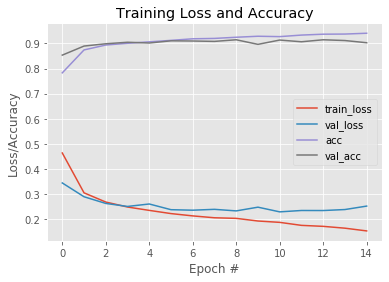

In [9]:
# plot the training + testing loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 15), H.history["accuracy"], label="acc")
plt.plot(np.arange(0, 15), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()